In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import fiona

import platform

In [2]:
# %pwd
# %ll

In [3]:
# general_path = '//wsl.localhost/Ubuntu/home/louise/code/MargaritaLK/phd_coding_paper2/depth_arrival_zones'
input_path = 'input'
figure_path = 'figures'

------------

### load data

In [4]:
## read shape zones
buurten_floodresults = gpd.read_file(f'input/buurten_scen1_test.shp')
buurten_floodresults.head(2)
# len(buurten_floodresults)
buurten_floodresults.columns

Index(['fid', 'BU_CODE', 'JRSTATCODE', 'BU_NAAM', 'WK_CODE', 'WK_NAAM',
       'GM_CODE', 'GM_NAAM', 'IND_WBI', 'H2O', 'POSTCODE', 'DEK_PERC', 'OAD',
       'STED', 'BEV_DICHTH', 'AANT_INW', 'AANT_MAN', 'AANT_VROUW',
       'P_00_14_JR', 'P_15_24_JR', 'P_25_44_JR', 'P_45_64_JR', 'P_65_EO_JR',
       'P_ONGEHUWD', 'P_GEHUWD', 'P_GESCHEID', 'P_VERWEDUW', 'AANTAL_HH',
       'P_EENP_HH', 'P_HH_Z_K', 'P_HH_M_K', 'GEM_HH_GR', 'P_WEST_AL',
       'P_N_W_AL', 'P_MAROKKO', 'P_ANT_ARU', 'P_SURINAM', 'P_TURKIJE',
       'P_OVER_NW', 'OPP_TOT', 'OPP_LAND', 'OPP_WATER', 'Shape_Leng',
       'Shape_Area', '_1ucount', '_1usum', '_1umean', '2u_count', '2u_sum',
       '2u_mean', '3u_count', '3u_sum', '3u_mean', '4u_count', '4u_sum',
       '4u_mean', '6u_count', '6u_sum', '6u_mean', '12_count', '12_sum',
       '12_mean', '24_count', '24_sum', '24_mean', 'geometry'],
      dtype='object')

In [5]:
# buurten_cbs = gpd.read_file(f'input/cbs_buurten.shp')
# buurten_cbs.head(1)
# # buurten_cbs.columns
# # len(buurten_cbs)

--------------------------

In [6]:
## SELECT RELEVANT FLOOD RESULTS
columns_select = [ 'BU_CODE',  'BU_NAAM', 'WK_CODE','AANT_INW','AANTAL_HH',
                  '_1umean','2u_mean', '3u_mean', '4u_mean', '6u_mean', '12_mean', '24_mean', 'geometry']

df_flood_select = buurten_floodresults.loc[:, lambda df: columns_select]
df_flood_select.head(2)

,BU_CODE,BU_NAAM,WK_CODE,AANT_INW,AANTAL_HH,_1umean,2u_mean,3u_mean,4u_mean,6u_mean,12_mean,24_mean,geometry
0,BU04000100,Marinehaven,WK040001,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((116195.075 551883.114, 116203...."
1,BU04000101,Oostsloot,WK040001,1115.0,650.0,1.333847,1.755653,1.863996,1.939903,2.137634,2.505901,1.893949,"POLYGON ((113271.703 553153.125, 113316.297 55..."


In [7]:
# ## SELECT RELEVANT CBS DATA

# #select buurten met > 1 inwoner
# df_cbs_metinwoners = buurten_cbs[buurten_cbs.AANT_INW > 1 ]

# #select relevant data
# df_cbs_select = df_cbs_metinwoners.loc[:, lambda df: ['BU_CODE', 'AANT_INW', 'AANTAL_HH']]
# df_cbs_select.head(2)

In [8]:
# df_merge = pd.merge(df_cbs_select, df_flood_select , how="inner", on= "BU_CODE")
# df_merge

In [9]:
# df_merge.to_file("merge.geojson", driver='GeoJSON')

In [10]:

x = np.zeros(len(df_flood_select))
x[:] = 1


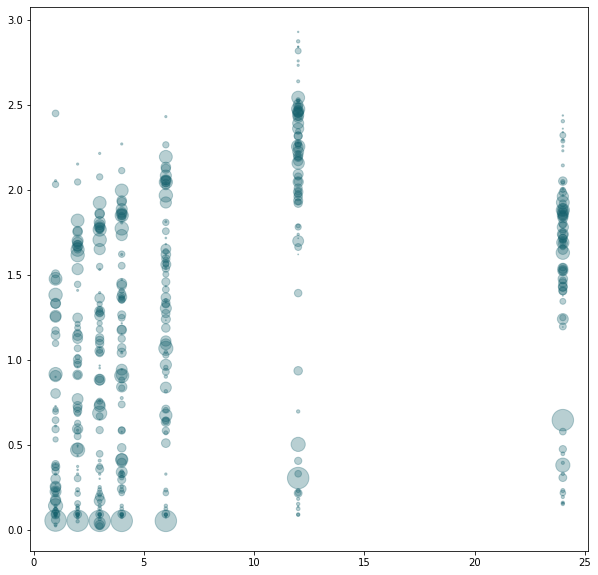

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

color_uniform = '#15616d'
alpha_uniform = 0.3
size_uniform = df_flood_select['AANTAL_HH']/7

x1 = np.zeros(len(df_flood_select))
x1[:] = 1
ax.scatter(x1, df_flood_select['_1umean'], s = size_uniform, alpha =alpha_uniform, c=color_uniform)

x2 = np.zeros(len(df_flood_select))
x2[:] = 2
ax.scatter(x2, df_flood_select['2u_mean'], s = size_uniform, alpha =alpha_uniform, c=color_uniform)

x3 = np.zeros(len(df_flood_select))
x3[:] = 3
ax.scatter(x3, df_flood_select['3u_mean'], s = size_uniform, alpha =alpha_uniform, c=color_uniform)

x4 = np.zeros(len(df_flood_select))
x4[:] = 4
ax.scatter(x4, df_flood_select['4u_mean'],  s = size_uniform, alpha =alpha_uniform, c=color_uniform)

x6 = np.zeros(len(df_flood_select))
x6[:] = 6
ax.scatter(x6, df_flood_select['6u_mean'],  s = size_uniform, alpha =alpha_uniform, c=color_uniform)



x12 = np.zeros(len(df_flood_select))
x12[:] = 12
ax.scatter(x12, df_flood_select['12_mean'],  s = size_uniform, alpha =alpha_uniform, c=color_uniform)



x24 = np.zeros(len(df_flood_select))
x24[:] = 24
ax.scatter(x24, df_flood_select['24_mean'],  s = size_uniform, alpha =alpha_uniform, c=color_uniform)


# ax.scatter(df_flood_select ['AANTAL_HH'], df_flood_select ['2u_mean'])
# ax.scatter(df_flood_select ['AANTAL_HH'], df_flood_select ['3u_mean'])
# ax.scatter(df_flood_select ['AANTAL_HH'], df_flood_select ['4u_mean'])
# ax.scatter(df_flood_select ['AANTAL_HH'], df_flood_select ['6u_mean'])
# ax.scatter(df_flood_select ['AANTAL_HH'], df_flood_select ['12_mean'])
# ax.scatter(df_flood_select ['AANTAL_HH'], df_flood_select ['24_mean'])

# ax.set_ylim(0,10)

plt.savefig(f'{figure_path}/waterdepth_zones_timeslices.png', dpi=300)
plt.savefig(f'{figure_path}/waterdepth_zones_timeslices.svg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


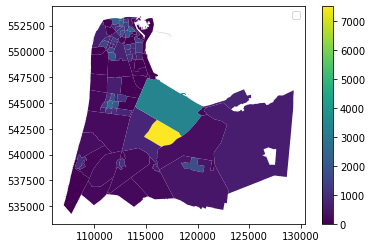

In [8]:
#clean inwoners data

inwoners = buurten_cbs[buurten_cbs.AANT_INW > 1 ]
# >gapminder_2002 = gapminder[gapminder['year']==2002]

buurten_cbs.plot(column = 'AANT_INW', legend = True)
plt.legend()

In [9]:
len(inwoners)

85

In [13]:
## create table with relevant datae

df = pd.DataFrame()

df['bu_code'] = buurten_floodresults.BU_CODE
df
# df['nr_inhabitans']
df

,bu_code
0,BU04000100
1,BU04000101
2,BU04000102
3,BU04000103
4,BU04000104
...,...
85,BU19110603
86,BU19110604
87,BU19110700
88,BU19110701
